# SVD Demo

This is a quick demo of what SVD does. This is based on notes from [Data Mining and Engineering](https://www.inf.ed.ac.uk/teaching/courses/dme/).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.linalg import svds

In [2]:
# helper functions you can skip over :D
SAVE = False
def maybe_save_plot(filename):
    if SAVE:
        plt.tight_layout()
        plt.savefig('images/' + filename, bbox_inches="tight")

## Math

Starting with data $X$ of size $D \times N$, which represents $N$ examples of $D$-dimensional data, if I run SVD on it and ask for $K$ dimensions, SVD will decompose it into

$$X = USV^{\top}$$

where $S$ is a diagonal matrix of size $K \times K$, $U$ and $V$ are orthonormal matrices, and if $X$ of size $D \times N$, then $U$ is size $D \times K$ and $V$ is of size $K \times N$. 

In [13]:
# Generate data!
D = 2
N = 200

L = np.tril(np.ones((D, D)))
x = np.vstack(((1, 0), (2, 1))) @ np.random.randn(D, N)

# SVD!
k = 1
u, s, vt = svds(x, k=k)
print(s)

print('k =', k, ', x shape', x.shape, ', u shape', u.shape, ', s shape', s.shape, ', vt shape', vt.shape)

# Projecting!
projected_x = u @ u.T @ x

# principle component direction
principle_component_direction_line = u @ np.linspace(-10, 10, 100).reshape(1, -1)
print('principle component direction\n', u)

# first principle component scores
principle_component_score = s @ vt

[ 33.36570128]
k = 1 , x shape (2, 200) , u shape (2, 1) , s shape (1,) , vt shape (1, 200)
principle component direction
 [[ 0.39026746]
 [ 0.92070153]]


## Plotting

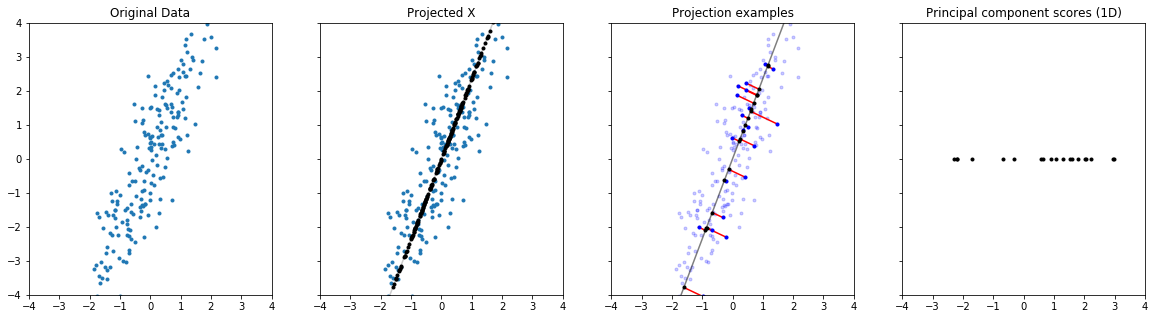

In [14]:
fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(20, 5))

axes[0].axis([-4, 4, -4, 4])

ORIGINAL_DATA = 0
SVD = 1
PROJECTION = 2
SCORE = 3

axes[ORIGINAL_DATA].plot(*x, '.')
axes[ORIGINAL_DATA].set_title('Original Data')

axes[SVD].plot(*x, '.')
axes[SVD].plot(*principle_component_direction_line, '-k', alpha=0.2)
axes[SVD].plot(*projected_x, '.k')
axes[SVD].set_title('Projected X')


axes[PROJECTION].plot(*x, '.b', alpha=0.2)
axes[PROJECTION].plot(*principle_component_direction_line, '-k', alpha=0.5)

# Plot a few lines showing where x moves to in projection
NUM_LINES_TO_DRAW = 20
for i in range(NUM_LINES_TO_DRAW):
    points = np.vstack((projected_x[:, i], x[:, i],)).T
    
    axes[PROJECTION].plot(points[0], points[1], '-r')
    
# Now add some points on top
axes[PROJECTION].plot(*x[:, :20], '.b')
axes[PROJECTION].plot(*projected_x[:, :20], '.k')
axes[PROJECTION].set_title('Projection examples')

axes[SCORE].plot(principle_component_score[:20], np.zeros(20), '.k')
axes[SCORE].set_title('Principal component scores (1D)')

plt.show()